In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [4]:
st=pd.read_csv('shippingtechupdated.csv')
st.head()

,trip,dt,x,y,speed,u,v,cog,heading,lat,lon,draft,rudder,rot_realized
0,0,2021-06-28T08:00:00.021959+00:00,3922397.017,3149397.297,0.005144,0.001227,0.004996,256.259075,180.054982,51.314869,4.276195,2.4845,-0.4,0.8
1,0,2021-06-28T08:00:00.372474+00:00,3922397.019,3149397.316,0.000000,0.000000,0.000000,260.783315,180.054982,51.314869,4.276195,2.4845,-0.7,0.8
2,0,2021-06-28T08:00:00.845801+00:00,3922397.017,3149397.297,0.005144,0.000709,0.005095,262.131445,180.055672,51.314869,4.276195,2.4845,-0.4,0.8
3,0,2021-06-28T08:00:01.350369+00:00,3922397.007,3149397.316,0.005144,-0.000206,0.005140,272.355535,180.055672,51.314869,4.276195,2.4845,-0.4,0.8
4,0,2021-06-28T08:00:01.462386+00:00,3922397.007,3149397.316,0.005144,-0.000207,0.005140,272.355535,180.049809,51.314869,4.276195,2.4850,-0.4,0.8


In [ ]:
# **Information of the dataset**

In [102]:
# statistical info
st.describe()


,trip,x,y,speed,u,v,cog,heading,lat,lon,draft,rudder,rot_realized
count,479813.000000,4.798130e+05,4.798130e+05,479813.000000,479813.000000,479813.000000,479813.000000,479813.000000,479813.000000,479813.000000,170033.000000,479813.000000,479813.000000
mean,8.966854,4.002232e+06,3.177616e+06,2.850689,2.817100,0.031783,179.784895,172.287432,51.613781,5.392664,1.812151,-1.152341,0.548993
std,3.691014,7.229914e+04,2.710886e+04,1.992603,2.015749,0.310781,95.787247,97.553897,0.232904,1.049494,0.486489,18.679328,6.208433
min,0.000000,3.908791e+06,3.127966e+06,0.000000,-1.969797,-3.043025,0.001388,0.000243,51.217422,3.995473,1.049500,-90.900000,-99.500000
25%,7.000000,3.923323e+06,3.151512e+06,0.252078,0.063860,-0.054898,99.802400,95.919631,51.380343,4.277997,1.300000,-1.600000,-1.100000
50%,8.000000,3.996494e+06,3.179354e+06,3.220422,3.215007,0.000000,169.333848,151.675564,51.654861,5.289718,1.840000,-0.100000,0.600000
75%,13.000000,4.087197e+06,3.202188e+06,4.367633,4.355669,0.134304,269.353363,257.841135,51.825849,6.626621,2.404500,2.900000,2.500000
max,15.000000,4.095453e+06,3.224413e+06,6.301944,6.301944,2.767639,359.998522,359.995312,51.977484,6.769625,2.519500,91.100000,88.700000


In [103]:
# datatype of attributes
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479813 entries, 0 to 479812
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   trip          479813 non-null  int64  
 1   dt            479813 non-null  object 
 2   x             479813 non-null  float64
 3   y             479813 non-null  float64
 4   speed         479813 non-null  float64
 5   u             479813 non-null  float64
 6   v             479813 non-null  float64
 7   cog           479813 non-null  float64
 8   heading       479813 non-null  float64
 9   lat           479813 non-null  float64
 10  lon           479813 non-null  float64
 11  draft         170033 non-null  float64
 12  rudder        479813 non-null  float64
 13  rot_realized  479813 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 51.2+ MB


In [ ]:
#Preprocessing of data

In [104]:
#Findin number of null values in each column
st.isnull().sum()

trip                 0
dt                   0
x                    0
y                    0
speed                0
u                    0
v                    0
cog                  0
heading              0
lat                  0
lon                  0
draft           309780
rudder               0
rot_realized         0
dtype: int64

ValueError: No axis named collumns for object type <class 'pandas.core.frame.DataFrame'>

In [105]:
st.apply(lambda x: len(x.unique()))

trip                16
dt              479813
x               365234
y               365570
speed             1226
u               430144
v               430605
cog             447801
heading         216369
lat             318310
lon             335684
draft             1816
rudder             576
rot_realized       784
dtype: int64

In [106]:
# check for categorical attributes
cat_col = []
for x in st.dtypes.index:
    if st.dtypes[x] == 'float64':
        cat_col.append(x)
    if st.dtypes[x] == 'int64':
        cat_col.append(x)
cat_col

['trip',
 'x',
 'y',
 'speed',
 'u',
 'v',
 'cog',
 'heading',
 'lat',
 'lon',
 'draft',
 'rudder',
 'rot_realized']

In [107]:
cat_col.remove('trip')
cat_col

['x',
 'y',
 'speed',
 'u',
 'v',
 'cog',
 'heading',
 'lat',
 'lon',
 'draft',
 'rudder',
 'rot_realized']

In [108]:
#Categorizing each collumn

for col in cat_col:
    print(col)
    print(st[col].value_counts())
    print()

x
3922400.492    193
3922400.502    149
3922400.500    147
3922400.457    117
3922400.489    111
              ... 
3920579.076      1
3920580.826      1
4093324.248      1
4039485.195      1
3925345.068      1
Name: x, Length: 365234, dtype: int64

y
3149478.751    149
3149478.824    143
3149478.770    132
3190515.714    126
3147537.481    120
              ... 
3202019.764      1
3148094.656      1
3207220.365      1
3150392.374      1
3153032.815      1
Name: y, Length: 365570, dtype: int64

speed
0.000000    47994
0.005144    43512
0.010289     8426
0.015433     3588
0.020578     1998
            ...  
6.291656       28
6.204200       26
6.271078       23
6.281367       16
6.286511       16
Name: speed, Length: 1226, dtype: int64

u
 0.000000    47994
 0.005144       12
-0.005144        8
 0.005144        6
 0.005144        6
             ...  
 4.402799        1
 5.807955        1
 3.848962        1
 2.813754        1
 5.595992        1
Name: u, Length: 430144, dtype: int64

v
 0.

In [109]:
# fill the missing values
draft_mean = st.pivot_table(index = 'draft')
draft_mean


'''
Linar interpoling instead of mean
I should have done something like
st_interpol = st.groupby('draft')\
                .resample('D')\
                .mean()
st_interpol['draft'] = df_interpol['draft'].interpolate()
st_interpol.head(4)

'''

,cog,heading,lat,lon,rot_realized,rudder,speed,trip,u,v,x,y
draft,,,,,,,,,,,,
1.0495,214.801031,359.451127,51.315602,4.276154,0.6,-1.30,0.005144,1.0,-0.004196,-0.002976,3.922401e+06,3.149479e+06
1.0500,221.517330,359.451127,51.315602,4.276154,0.6,-1.30,0.005144,1.0,-0.003819,-0.003447,3.922401e+06,3.149479e+06
1.0515,216.487755,359.445411,51.315602,4.276154,0.6,-1.30,0.005144,1.0,-0.004104,-0.003098,3.922401e+06,3.149479e+06
1.0520,217.283622,359.445282,51.315602,4.276154,0.8,-1.30,0.005144,1.0,-0.004063,-0.003156,3.922401e+06,3.149479e+06
1.0525,217.283622,359.445473,51.315602,4.276154,0.6,-1.30,0.005144,1.0,-0.004063,-0.003156,3.922401e+06,3.149479e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
2.5145,295.209049,180.261044,51.314868,4.276201,0.8,-0.55,0.000000,0.0,0.000000,0.000000,3.922397e+06,3.149397e+06
2.5155,266.450042,180.246330,51.314868,4.276201,0.8,-0.40,0.000000,0.0,0.000000,0.000000,3.922397e+06,3.149397e+06
2.5160,268.621637,180.246330,51.314868,4.276201,0.8,-0.40,0.000000,0.0,0.000000,0.000000,3.922397e+06,3.149397e+06


In [110]:
miss_bool = st['draft'].isnull()
miss_bool

0         False
1         False
2         False
3         False
4         False
          ...  
479808     True
479809     True
479810     True
479811     True
479812     True
Name: draft, Length: 479813, dtype: bool

In [111]:
#First attempt of fillinf in the values , but I found an easer way below
'''for i, draft in enumerate(st['draft']):
    if miss_bool[i]:
        if draft in draft_mean:
            st['draft'][i] = draft_mean.loc[item]['draft']
        else:
            st['draft'][i] = np.mean(st['draft'])
            '''
            

"for i, draft in enumerate(st['draft']):\n    if miss_bool[i]:\n        if draft in draft_mean:\n            st['draft'][i] = draft_mean.loc[item]['draft']\n        else:\n            st['draft'][i] = np.mean(st['draft'])\n            "

In [112]:
#Filling in null values in draft
st['draft'] = st['draft'].fillna(st['draft'].mean())

In [113]:
#Checking how many null values are left
st['draft'].isnull().sum()

0

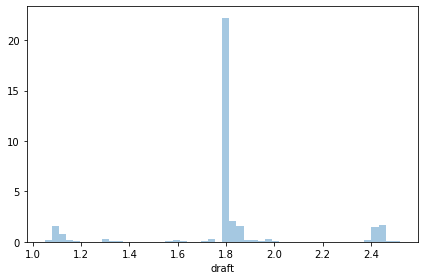

In [114]:
#Some plots I tried to visualise the data
sns.distplot(st['draft'])

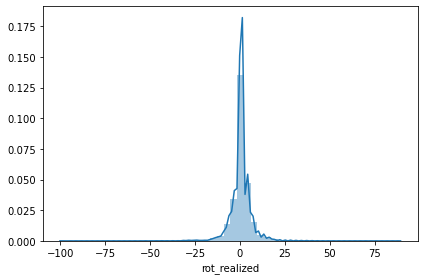

In [115]:
sns.distplot(st['rot_realized'])

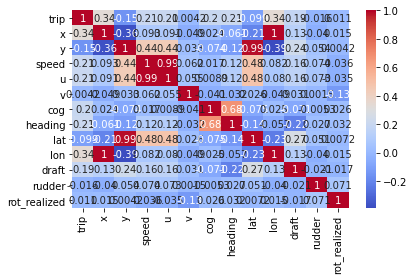

In [116]:
corr = st.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [117]:
st.head()

,trip,dt,x,y,speed,u,v,cog,heading,lat,lon,draft,rudder,rot_realized
0,0,2021-06-28T08:00:00.021959+00:00,3922397.017,3149397.297,0.005144,0.001227,0.004996,256.259075,180.054982,51.314869,4.276195,2.4845,-0.4,0.8
1,0,2021-06-28T08:00:00.372474+00:00,3922397.019,3149397.316,0.000000,0.000000,0.000000,260.783315,180.054982,51.314869,4.276195,2.4845,-0.7,0.8
2,0,2021-06-28T08:00:00.845801+00:00,3922397.017,3149397.297,0.005144,0.000709,0.005095,262.131445,180.055672,51.314869,4.276195,2.4845,-0.4,0.8
3,0,2021-06-28T08:00:01.350369+00:00,3922397.007,3149397.316,0.005144,-0.000206,0.005140,272.355535,180.055672,51.314869,4.276195,2.4845,-0.4,0.8
4,0,2021-06-28T08:00:01.462386+00:00,3922397.007,3149397.316,0.005144,-0.000207,0.005140,272.355535,180.049809,51.314869,4.276195,2.4850,-0.4,0.8


In [ ]:
#Test-Train Split up

In [118]:
# X , y split up
X = st[['x','y','speed','u','v','cog','heading','lat','lon','draft','rudder']]
y = st[['rot_realized']]

In [119]:
y

,rot_realized
0,0.8
1,0.8
2,0.8
3,0.8
4,0.8
...,...
479808,0.8
479809,0.8
479810,0.8
479811,0.8


In [120]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# from sklearn.model_selection import train_test_split # Used this first
#model = LinearRegression(normalize=True)
#train(model, X, y)

In [121]:
#Train test split 
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
TimeSeriesSplit(n_splits=2)


TimeSeriesSplit(max_train_size=None, n_splits=2)

In [122]:
st['trip'].value_counts()

8     115816
13    109818
4      52314
7      50118
12     27202
11     22808
10     15327
9      15231
14     14561
15     13768
0       8009
3       7850
1       7602
2       7599
5       6956
6       4834
Name: trip, dtype: int64

In [123]:
st['trip'].value_counts().sum()

479813

In [124]:
#Manual split up of test and train data based on trip id. Trip 1-13 were train data while the last two were train data
test_size=st['trip'].value_counts()[14]+st['trip'].value_counts()[15]

In [125]:
#Assighning and declaring the testizes
st_train = st[:-test_size]
st_test = st[-test_size:]

In [126]:
st_train.tail()

,trip,dt,x,y,speed,u,v,cog,heading,lat,lon,draft,rudder,rot_realized
451479,13,2021-07-03T15:59:57.951485+00:00,3920563.570,3163376.016,0.0,0.0,0.0,132.065700,177.279089,51.438771,4.234195,1.812151,3.2,2.9
451480,13,2021-07-03T15:59:58.615353+00:00,3920563.570,3163376.016,0.0,0.0,0.0,123.033776,177.279089,51.438771,4.234195,1.812151,2.9,2.9
451481,13,2021-07-03T15:59:58.924922+00:00,3920563.570,3163376.016,0.0,0.0,0.0,121.405639,177.345853,51.438771,4.234195,1.812151,3.2,2.9
451482,13,2021-07-03T15:59:59.350487+00:00,3920563.570,3163376.016,0.0,0.0,0.0,110.261007,177.345853,51.438771,4.234195,1.812151,2.9,3.1
451483,13,2021-07-03T15:59:59.951730+00:00,3920563.558,3163376.017,0.0,0.0,0.0,100.157444,177.345853,51.438771,4.234195,1.812151,3.2,2.9


In [127]:
st_test.head()

,trip,dt,x,y,speed,u,v,cog,heading,lat,lon,draft,rudder,rot_realized
451484,14,2021-07-04T16:00:00.037575+00:00,3920563.738,3163362.399,0.051444,0.050473,-0.009949,166.416029,177.567353,51.438649,4.234213,1.812151,2.9,3.3
451485,14,2021-07-04T16:00:00.349613+00:00,3920563.747,3163362.362,0.051444,0.050650,-0.009004,167.487329,177.567353,51.438649,4.234213,1.812151,3.2,3.3
451486,14,2021-07-04T16:00:00.846008+00:00,3920563.745,3163362.343,0.051444,0.050590,-0.009338,167.116874,177.575190,51.438649,4.234213,1.812151,3.2,3.3
451487,14,2021-07-04T16:00:01.347429+00:00,3920563.743,3163362.306,0.051444,0.051087,-0.006057,170.821657,177.582739,51.438648,4.234213,1.812151,3.2,3.3
451488,14,2021-07-04T16:00:01.858551+00:00,3920563.741,3163362.288,0.056589,0.056427,-0.004280,173.245044,177.582739,51.438648,4.234213,1.812151,3.2,3.5


In [12]:
#Training data
X_train = st_train[['x','y','speed','u','v','cog','heading','lat','lon','draft','rudder']]
y_train = st_train[['rot_realized']]

#Testing data
X_test = st_test[['x','y','speed','u','v','cog','heading','lat','lon','draft','rudder']]
y_test = st_test[['rot_realized']]

NameError: name 'st_train' is not defined

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import math

In [ ]:
#Linear Regression Model

In [14]:
model = LinearRegression(normalize=True)
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    predict1 = model.predict(X)

In [15]:
model.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [158]:
predict1 =model.predict(X_test)

In [159]:
cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

In [160]:
predict1

array([[ 0.73710522],
       [ 0.74201854],
       [ 0.74292274],
       ...,
       [-1.55038223],
       [-1.55824078],
       [-1.55020769]])

In [161]:
st_test["Predicted rot_realised"] =predict1

In [162]:
#Preicted rot-realised via linear regression
st_test.head()

,trip,dt,x,y,speed,u,v,cog,heading,lat,lon,draft,rudder,rot_realized,Predicted rot_realised
451484,14,2021-07-04T16:00:00.037575+00:00,3920563.738,3163362.399,0.051444,0.050473,-0.009949,166.416029,177.567353,51.438649,4.234213,1.812151,2.9,3.3,0.737105
451485,14,2021-07-04T16:00:00.349613+00:00,3920563.747,3163362.362,0.051444,0.050650,-0.009004,167.487329,177.567353,51.438649,4.234213,1.812151,3.2,3.3,0.742019
451486,14,2021-07-04T16:00:00.846008+00:00,3920563.745,3163362.343,0.051444,0.050590,-0.009338,167.116874,177.575190,51.438649,4.234213,1.812151,3.2,3.3,0.742923
451487,14,2021-07-04T16:00:01.347429+00:00,3920563.743,3163362.306,0.051444,0.051087,-0.006057,170.821657,177.582739,51.438648,4.234213,1.812151,3.2,3.3,0.734303
451488,14,2021-07-04T16:00:01.858551+00:00,3920563.741,3163362.288,0.056589,0.056427,-0.004280,173.245044,177.582739,51.438648,4.234213,1.812151,3.2,3.5,0.728296


In [163]:
#Calculating the r2 score of the predicted data
scoreLr = r2_score(y_test,predict1)

In [164]:
print("Model Report")
print("MSE:",mean_squared_error(y_test,predict1))
print("Root MSE:",sqrt(mean_squared_error(y_test,predict1)))
print("CV Score:", cv_score)
print("R2 Score: ", scoreLr)

Model Report
MSE: 5.546041067518437
Root MSE: 2.3550034113602547
CV Score: 38.24542927147867
R2 Score:  -0.7878466063553871


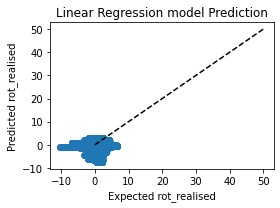

In [165]:
#Linear regression Graph
expected=y_test
plt.figure(figsize=(4, 3))
plt.scatter(expected, predict1)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.title("Linear Regression model Prediction")
plt.xlabel('Expected rot_realised')
plt.ylabel('Predicted rot_realised')
plt.tight_layout()

In [ ]:
#GradientBoostingRegressor

In [166]:
model2 = GradientBoostingRegressor()
def train(model2, X, y):
    # train the model
    model2.fit(X, y)
    
    # predict the training set
    predict2 = model2.predict(X)


In [167]:
model2.fit(X_train,y_train)

GradientBoostingRegressor()

In [168]:
predict2 =model2.predict(X_test)

In [169]:
cv_score = cross_val_score(model2, X, y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

In [170]:
predict2

array([ 1.84355263,  1.84355263,  1.84355263, ..., -1.82073375,
       -1.82073375, -1.82073375])

In [171]:
st_test["Predicted rot_realised"] =predict2

In [172]:
#Preicted rot-realised via gradient boosting regression
st_test.head()

,trip,dt,x,y,speed,u,v,cog,heading,lat,lon,draft,rudder,rot_realized,Predicted rot_realised
451484,14,2021-07-04T16:00:00.037575+00:00,3920563.738,3163362.399,0.051444,0.050473,-0.009949,166.416029,177.567353,51.438649,4.234213,1.812151,2.9,3.3,1.843553
451485,14,2021-07-04T16:00:00.349613+00:00,3920563.747,3163362.362,0.051444,0.050650,-0.009004,167.487329,177.567353,51.438649,4.234213,1.812151,3.2,3.3,1.843553
451486,14,2021-07-04T16:00:00.846008+00:00,3920563.745,3163362.343,0.051444,0.050590,-0.009338,167.116874,177.575190,51.438649,4.234213,1.812151,3.2,3.3,1.843553
451487,14,2021-07-04T16:00:01.347429+00:00,3920563.743,3163362.306,0.051444,0.051087,-0.006057,170.821657,177.582739,51.438648,4.234213,1.812151,3.2,3.3,1.843553
451488,14,2021-07-04T16:00:01.858551+00:00,3920563.741,3163362.288,0.056589,0.056427,-0.004280,173.245044,177.582739,51.438648,4.234213,1.812151,3.2,3.5,1.843553


In [173]:
#Calculating the r2 score of the predicted data
scoreGr = r2_score(y_test,predict2)

In [188]:
print(" Gradient boosting regression Model Report")
print("MSE:",mean_squared_error(y_test,predict2))
print("Root MSE:",sqrt(mean_squared_error(y_test,predict2)))
print("CV Score:", cv_score)
print("R2 Score: ", scoreGr)

 Gradient boosting regression Model Report
MSE: 3.947072997883271
Root MSE: 1.9867241876725796
CV Score: 59.86503085131229
R2 Score:  -1.8024157530674025


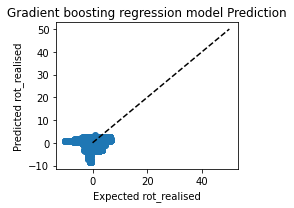

In [175]:
#Gradient boosting regression Graph
expected=y_test
plt.figure(figsize=(4, 3))
plt.scatter(expected, predict2)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.title("Gradient boosting regression model Prediction")
plt.xlabel('Expected rot_realised')
plt.ylabel('Predicted rot_realised')
plt.tight_layout()

In [176]:
#Random Forest Regression Model

In [177]:
model3 = RandomForestRegressor()
def train(model3, X, y):
    # train the model
    model3.fit(X, y)
    
    # predict the training set
    predict3 = model3.predict(X)

In [178]:
model3.fit(X_train,y_train)

RandomForestRegressor()

In [179]:
predict3 =model3.predict(X_test)

In [180]:
predict3

array([0.297, 0.341, 0.337, ..., 1.446, 1.336, 1.446])

In [181]:
st_test["Predicted rot_realised"] =predict3

In [182]:
st_test.head()

,trip,dt,x,y,speed,u,v,cog,heading,lat,lon,draft,rudder,rot_realized,Predicted rot_realised
451484,14,2021-07-04T16:00:00.037575+00:00,3920563.738,3163362.399,0.051444,0.050473,-0.009949,166.416029,177.567353,51.438649,4.234213,1.812151,2.9,3.3,0.297
451485,14,2021-07-04T16:00:00.349613+00:00,3920563.747,3163362.362,0.051444,0.050650,-0.009004,167.487329,177.567353,51.438649,4.234213,1.812151,3.2,3.3,0.341
451486,14,2021-07-04T16:00:00.846008+00:00,3920563.745,3163362.343,0.051444,0.050590,-0.009338,167.116874,177.575190,51.438649,4.234213,1.812151,3.2,3.3,0.337
451487,14,2021-07-04T16:00:01.347429+00:00,3920563.743,3163362.306,0.051444,0.051087,-0.006057,170.821657,177.582739,51.438648,4.234213,1.812151,3.2,3.3,0.574
451488,14,2021-07-04T16:00:01.858551+00:00,3920563.741,3163362.288,0.056589,0.056427,-0.004280,173.245044,177.582739,51.438648,4.234213,1.812151,3.2,3.5,0.510


In [183]:
cv_score = cross_val_score(model3, X, y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

In [184]:
scoreRfr = r2_score(y_test,predict3)

In [185]:
print("Random Forest regression Model Report")
print("Root MSE:",sqrt(mean_squared_error(y_test,predict3)))
print("MSE:",mean_squared_error(y_test,predict3))
print("CV Score:", cv_score)
print("R2 Score: ", scoreRfr)

Random Forest regression Model Report
Root MSE: 2.9484427272109306
MSE: 8.693314515643031
CV Score: 59.86503085131229
R2 Score:  0.9988732493684276


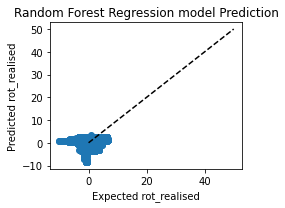

In [186]:
#Random Forest regression Graph
expected=y_test
plt.figure(figsize=(4, 3))
plt.scatter(expected, predict2)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.title("Random Forest Regression model Prediction")
plt.xlabel('Expected rot_realised')
plt.ylabel('Predicted rot_realised')
plt.tight_layout()

In [ ]:
# Model Evaluation

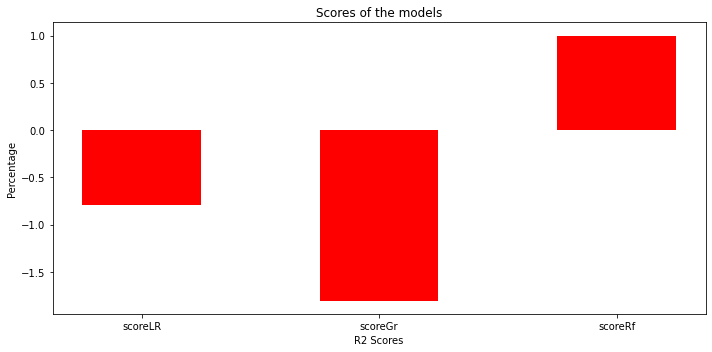

In [189]:
# R2 Scores of the models
data_dict = {'scoreLR':-0.7878466063553871, 'scoreGr': -1.8024157530674025, 'scoreRf':0.9988732493684276}
scores = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(scores, values, color ='red',
        width = 0.5)
plt.xlabel("R2 Scores")
plt.ylabel("Percentage")
plt.title("Scores of the models")
plt.show()

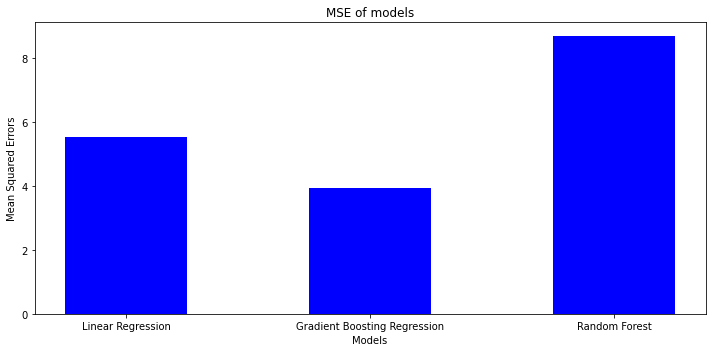

In [187]:
#MSE of the models
data_dict = {'Linear Regression':5.546041067518437, 'Gradient Boosting Regression':3.947072997883271, 'Random Forest': 8.693314515643031}
scores = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(scores, values, color ='blue',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("Mean Squared Errors")
plt.title("MSE of models")
plt.show()

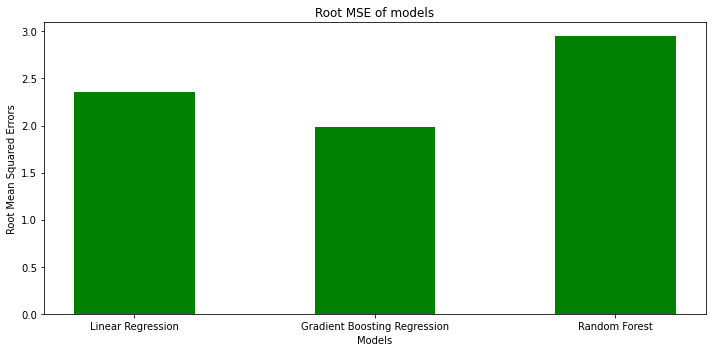

In [191]:
# Root MSE of the models
data_dict = {'Linear Regression': 2.3550034113602547, 'Gradient Boosting Regression':1.9867241876725796, 'Random Forest': 2.9484427272109306}
scores = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(scores, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("Root Mean Squared Errors")
plt.title("Root MSE of models")
plt.show()

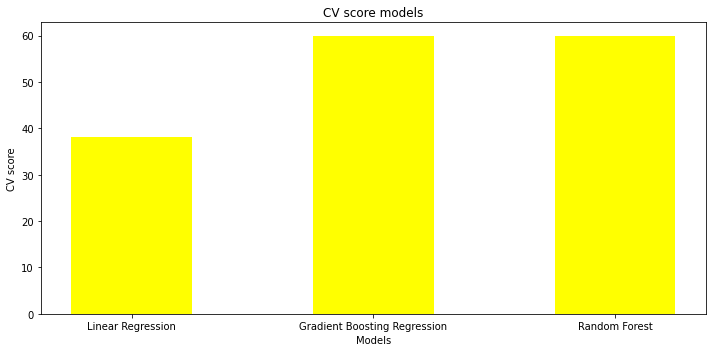

In [193]:
#CV score of the models
data_dict = {'Linear Regression': 38.24542927147867, 'Gradient Boosting Regression':59.86503085131229, 'Random Forest':59.86503085131229}
scores = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(scores, values, color ='yellow',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("CV score")
plt.title("CV score models")
plt.show()